<a href="https://colab.research.google.com/github/Paaaark/Kaggle/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn import model_selection
import csv
from tabulate import tabulate

In [18]:
%run /content/drive/MyDrive/Kaggle/titanic/helper.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# TensorFlow Deep Neural Network

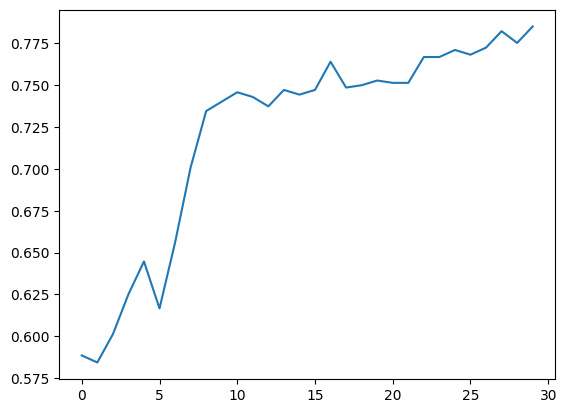

In [49]:
train_x, train_y = process_data(df)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[6,]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(train_x, train_y, epochs=30, verbose=False,
                 validation_split=0.2)
plt.plot(hist.history['acc'])
plt.show()

# Scikit-learn Models Benchmark

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = [RandomForestClassifier(max_depth=2, random_state=0),
          DecisionTreeClassifier(random_state=0),
          GaussianNB(),
          KNeighborsClassifier(n_neighbors=5),
          SVC(gamma='auto'),
          MLPClassifier(random_state=1, max_iter=500, solver='lbfgs', early_stopping=True)]
model_names = ['Random Forest', 'Decision Tree', 'GaussianNB', 'K-Neighbors',
               'SVM', 'Neural Network']

train_x, test_x, train_y, test_y = process_data(df, 0.2, drop_columns=['Embarked'])
for model, model_name in zip(models, model_names):
  model = model.fit(train_x, train_y)
  print(model_name)
  print("Train Acc: ", model.score(train_x, train_y))
  print("Test Acc: ", model.score(test_x, test_y))

Random Forest
Train Acc:  0.7963483146067416
Test Acc:  0.7597765363128491
Decision Tree
Train Acc:  0.9283707865168539
Test Acc:  0.7653631284916201
GaussianNB
Train Acc:  0.7865168539325843
Test Acc:  0.7094972067039106
K-Neighbors
Train Acc:  0.8455056179775281
Test Acc:  0.7039106145251397
SVM
Train Acc:  0.8188202247191011
Test Acc:  0.7597765363128491
Neural Network
Train Acc:  0.8679775280898876
Test Acc:  0.7206703910614525


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [60]:
train_x, test_x, train_y, test_y = process_data(df, 0.4, drop_columns=['Embarked', 'Fare'])
print(len(train_x[0]))
fitted_model = []
for n in range(2, 16):
  model = KNeighborsClassifier(n_neighbors=n)
  model = model.fit(train_x, train_y)
  fitted_model.append(model)
  print(n)
  print("Train Acc: ", model.score(train_x, train_y))
  print("Test Acc: ", model.score(test_x, test_y))

4
2
Train Acc:  0.8014981273408239
Test Acc:  0.7787114845938375
3
Train Acc:  0.8258426966292135
Test Acc:  0.7899159663865546
4
Train Acc:  0.8220973782771536
Test Acc:  0.7899159663865546
5
Train Acc:  0.8239700374531835
Test Acc:  0.7871148459383753
6
Train Acc:  0.8220973782771536
Test Acc:  0.7843137254901961
7
Train Acc:  0.8258426966292135
Test Acc:  0.7815126050420168
8
Train Acc:  0.8202247191011236
Test Acc:  0.7759103641456583
9
Train Acc:  0.8220973782771536
Test Acc:  0.7787114845938375
10
Train Acc:  0.8202247191011236
Test Acc:  0.773109243697479
11
Train Acc:  0.8183520599250936
Test Acc:  0.7787114845938375
12
Train Acc:  0.8164794007490637
Test Acc:  0.773109243697479
13
Train Acc:  0.8239700374531835
Test Acc:  0.773109243697479
14
Train Acc:  0.8183520599250936
Test Acc:  0.7703081232492998
15
Train Acc:  0.8239700374531835
Test Acc:  0.7703081232492998


# Decision Tree Models Benchmark

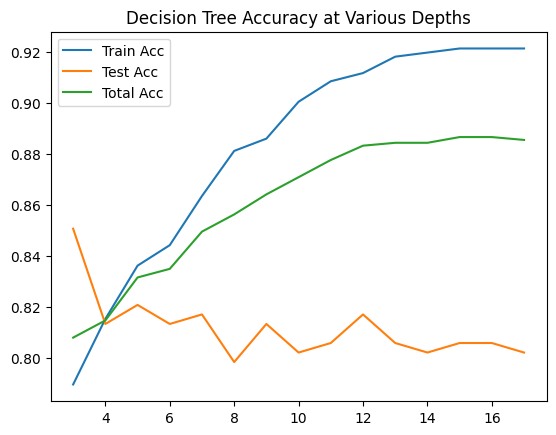

In [77]:
train_x, test_x, train_y, test_y = process_data(df, 0.3, drop_columns=['Embarked'])
x, y = process_data(df, drop_columns=['Embarked'])
options = ["gini"]
test_acc = []
train_acc = []
total_acc = []
my_range = range(3, 18, 1)
for i in my_range:
  model = DecisionTreeClassifier(max_depth=i)
  model = model.fit(train_x, train_y)
  test_acc.append(model.score(test_x, test_y))
  train_acc.append(model.score(train_x, train_y))
  total_acc.append(model.score(x, y))
plt.plot(my_range, train_acc)
plt.plot(my_range, test_acc)
plt.plot(my_range, total_acc)
plt.title("Decision Tree Accuracy at Various Depths")
plt.legend(['Train Acc', 'Test Acc', 'Total Acc'])

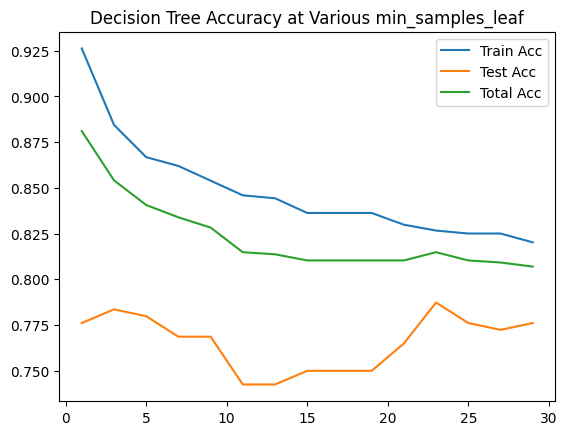

In [84]:
train_x, test_x, train_y, test_y = process_data(df, 0.3, drop_columns=['Embarked'])
x, y = process_data(df, drop_columns=['Embarked'])
options = ["gini"]
test_acc = []
train_acc = []
total_acc = []
my_range = range(1, 30, 2)
for i in my_range:
  model = DecisionTreeClassifier(min_samples_leaf=i)
  model = model.fit(train_x, train_y)
  test_acc.append(model.score(test_x, test_y))
  train_acc.append(model.score(train_x, train_y))
  total_acc.append(model.score(x, y))
plt.plot(my_range, train_acc)
plt.plot(my_range, test_acc)
plt.plot(my_range, total_acc)
plt.title("Decision Tree Accuracy at Various min_samples_leaf")
plt.legend(['Train Acc', 'Test Acc', 'Total Acc'])

In [96]:
train_x, test_x, train_y, test_y = process_data(df, 0.3, drop_columns=['Embarked'])
x, y = process_data(df, drop_columns=['Embarked'])
options = ["gini"]
acc = {}
depth_range = range(3, 17, 1)
leaf_range = range(1, 10, 1)
my_models = {}
for depth in depth_range:
  for leaf in leaf_range:
    model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
    model = model.fit(train_x, train_y)
    scores = [model.score(train_x, train_y), model.score(test_x, test_y),
              model.score(x, y)]
    key = '(' + str(depth) + ', ' + str(leaf) + ')'
    acc[key] = scores
    my_models[key] = model
acc = sorted(acc.items(), key=lambda x:x[1][2], reverse=True)
to_table = []
for data in acc:
  to_table.append([data[0], data[1][0], data[1][1], data[1][2]])
print("Decision Tree Accuracy at Various max_depth and min_samples_leaf")
print("Sorted by high to low accuracy")
print(tabulate(to_table, headers=['(depth, leaf)', 'train_acc', 'test_acc', 'acc']))
# plt.plot(my_range, train_acc)
# plt.plot(my_range, test_acc)
# plt.plot(my_range, total_acc)
# plt.title("Decision Tree Accuracy at Various min_samples_leaf")
# plt.legend(['Train Acc', 'Test Acc', 'Total Acc'])

Decision Tree Accuracy at Various max_depth and min_samples_leaf
Sorted by high to low accuracy
(depth, leaf)      train_acc    test_acc       acc
---------------  -----------  ----------  --------
(16, 1)             0.930979    0.768657  0.882155
(15, 1)             0.930979    0.764925  0.881033
(14, 1)             0.930979    0.761194  0.87991
(13, 1)             0.929374    0.761194  0.878788
(12, 1)             0.924559    0.761194  0.875421
(11, 1)             0.921348    0.761194  0.873176
(10, 1)             0.916533    0.764925  0.870932
(9, 1)              0.906902    0.772388  0.866442
(8, 1)              0.895666    0.783582  0.861953
(11, 2)             0.892456    0.757463  0.851852
(12, 2)             0.892456    0.757463  0.851852
(13, 2)             0.892456    0.757463  0.851852
(14, 2)             0.892456    0.757463  0.851852
(15, 2)             0.892456    0.757463  0.851852
(16, 2)             0.892456    0.757463  0.851852
(9, 2)              0.88764     0.7611

In [63]:
from sklearn.decomposition import PCA
train_x, test_x, train_y, test_y = process_data(df, 0.2)

pca = PCA()
pca.fit(train_x)
print(pca.explained_variance_ratio_)
print(train_x)

[0.41031488 0.27965333 0.1153202  0.10511885 0.04941706 0.04017568]
tf.Tensor(
[[ 3.          0.          0.          0.         -0.70621053  2.        ]
 [ 2.          0.          0.          0.         -0.53769158  2.        ]
 [ 3.          0.          0.          0.         -0.7065146   2.        ]
 ...
 [ 3.          0.          0.          0.         -0.70621053  2.        ]
 [ 2.          0.          1.          1.         -0.03762989  0.        ]
 [ 1.          1.          1.          1.          2.67332724  0.        ]], shape=(712, 6), dtype=float64)


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

train_x, test_x, train_y, test_y = process_data(df, split_rate=0.2)
# print(train_x)
model = DecisionTreeClassifier(max_depth=10)
# model = model.fit(train_x, train_y)
models = cross_validate(model, train_x, train_y)

In [98]:
test_df = pd.read_csv('/content/drive/MyDrive/Kaggle/titanic/test.csv')

test = process_data(test_df, drop_columns=['Embarked'])
desired_model = my_models['(9, 1)']
prediction = desired_model.predict(test)
print(prediction)
write_prediction(prediction, 'DecisionTree(9, 1)')

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 0]
